# One time correlation for Duke Silica Spheres

In [1]:
import skxray.speckle_visibility.speckle_visibility as spe
import skxray.roi as roi
import skxray.correlation as corr

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [2]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

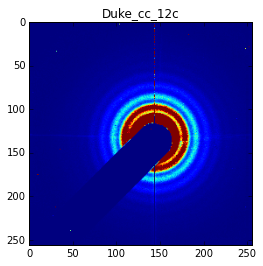

In [3]:
sum_img = np.average(duke_data, axis=0)
plt.imshow(sum_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

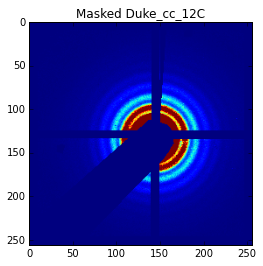

In [4]:
mask = ~np.load("/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/Luxi_duke_mask.npy")
flat_field = np.load("/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/Luxi_duke_flat.npy")

plt.imshow(mask*sum_img, vmax=1e0)
plt.title("Masked Duke_cc_12C")
plt.show()

## Created the Roi mask

In [57]:
inner_radius = 30
width = 1
spacing = 1
num_rings = 10
center = (133, 143)

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, sum_img.shape)

def test_demo(ax, label_array, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """

    vmin, vmax = np.percentile(image, [100, 100])
    #im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    im = ax.imshow(image, interpolation='none', norm=LogNorm(), vmax=1e0)
    im = ax.imshow(label_array, interpolation='none', norm=LogNorm())
    #im = ax.imshow(image, interpolation='none',  vmax=1e0)

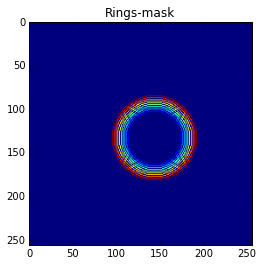

In [58]:
plt.imshow(rings)
plt.title("Rings-mask")
plt.show()

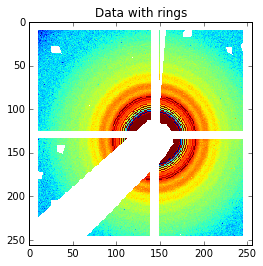

In [59]:
fig, ax = plt.subplots()
plt.title("Data with rings")
test_demo(ax, rings*mask, sum_img.shape, sum_img*mask)
plt.show()

In [63]:
mask_data2 = mask*duke_data[0:4999]

img_it = np.nditer(mask_data2)
ring_mask = rings*mask

## One-time Correlation

In [64]:
num_levels = 7
num_bufs = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, ring_mask,
                                             img_it)

In [50]:
exposuretime=0.001;
deadtime=60e-6;
timeperframe = exposuretime+deadtime
lags = lag_steps*timeperframe

In [68]:
roi_names = ['gray', 'orange', 'brown', 'red', 'green', 'blue', 'black', 'purple', 'pink', 'yellow']

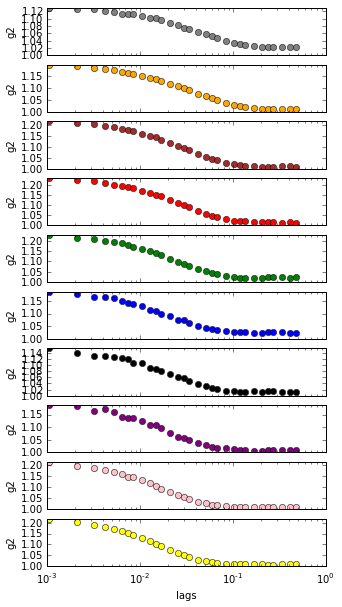

In [70]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(5,10))
axes[num_rings-1].set_xlabel("lags")
for i, roi_color in zip(range(num_rings), roi_names):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lags, g2[:, i], 'o', markerfacecolor=roi_color, markersize=6)
    axes[i].set_ylim(bottom=1, top=np.max(g2[1:, i]))
plt.show()
